# Solar Power Prediction
Antonio Lang
CS 458

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

training_data = pd.read_csv("solar_training.csv")
test_data = pd.read_csv("solar_test.csv")

# Data Exploration

In [95]:
training_data.head()

,ZONEID,TIMESTAMP,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,1,20120401 01:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,1,20120401 02:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,1,20120401 03:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,1,20120401 04:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,1,20120401 05:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [96]:
# Converts the timestamps into Datetime
training_data['TIMESTAMP'] = pd.to_datetime(training_data['TIMESTAMP'], format='%Y%m%d %H:%M')
test_data['TIMESTAMP'] = pd.to_datetime(test_data['TIMESTAMP'], format='%Y%m%d %H:%M')
training_data.rename(columns={'TIMESTAMP':'DATETIME'}, inplace=True)
test_data.rename(columns={'TIMESTAMP':'DATETIME'}, inplace=True)

# Separates the labels from the samples
# training_power = training_data.pop('POWER')
# test_power = test_data.pop('POWER')

In [97]:
training_data_1 = training_data[training_data['ZONEID'] == 1]
test_data_1 = test_data[test_data['ZONEID'] == 1]
training_data_1.pop('ZONEID')

0        1
1        1
2        1
3        1
4        1
        ..
10939    1
10940    1
10941    1
10942    1
10943    1
Name: ZONEID, Length: 10944, dtype: int64

In [98]:
training_data_1.head()

,DATETIME,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228,POWER
0,2012-04-01 01:00:00,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000,0.754103
1,2012-04-01 02:00:00,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000,0.555000
2,2012-04-01 03:00:00,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341,0.438397
3,2012-04-01 04:00:00,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501,0.145449
4,2012-04-01 05:00:00,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331,0.111987


In [99]:
training_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZONEID,32832.0,2.000000e+00,8.165090e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
VAR78,32832.0,3.972925e-02,1.133595e-01,0.000000,0.000000e+00,2.702713e-03,3.370478e-02,2.068974e+00
VAR79,32832.0,1.569156e-02,4.872373e-02,0.000000,0.000000e+00,9.970000e-05,6.114316e-03,6.066458e-01
VAR134,32832.0,9.385919e+04,1.094945e+03,90359.000000,9.294675e+04,9.406238e+04,9.470189e+04,9.630806e+04
VAR157,32832.0,6.854489e+01,1.971381e+01,8.525364,5.376610e+01,7.149540e+01,8.534492e+01,1.017909e+02
VAR164,32832.0,4.227350e-01,3.970266e-01,0.000000,1.000977e-02,3.221868e-01,8.605469e-01,1.000008e+00
VAR165,32832.0,6.842536e-01,2.403277e+00,-8.908603,-7.597842e-01,3.517013e-01,2.064232e+00,1.305672e+01
VAR166,32832.0,-1.048489e-01,2.073906e+00,-8.404230,-1.521249e+00,-2.937789e-01,1.137790e+00,1.071100e+01
VAR167,32832.0,2.846813e+02,7.063519e+00,269.596435,2.793439e+02,2.838306e+02,2.893610e+02,3.100623e+02
VAR169,32832.0,1.186076e+07,6.388731e+06,149878.000000,7.156000e+06,1.054804e+07,1.634618e+07,3.442611e+07


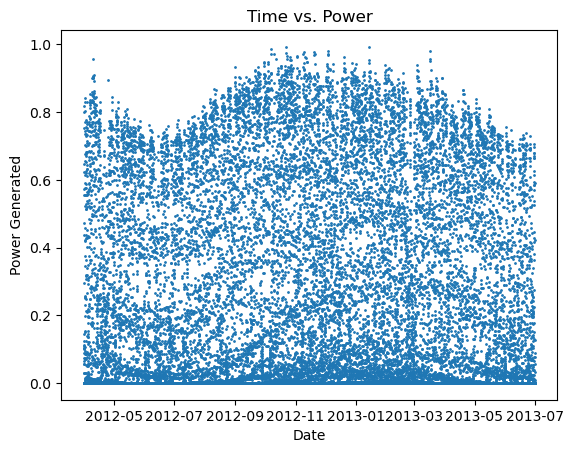

In [100]:
plt.title("Time vs. Power")
plt.xlabel("Date")
plt.ylabel("Power Generated")
plt.scatter(training_data['DATETIME'], training_data['POWER'], s=1)

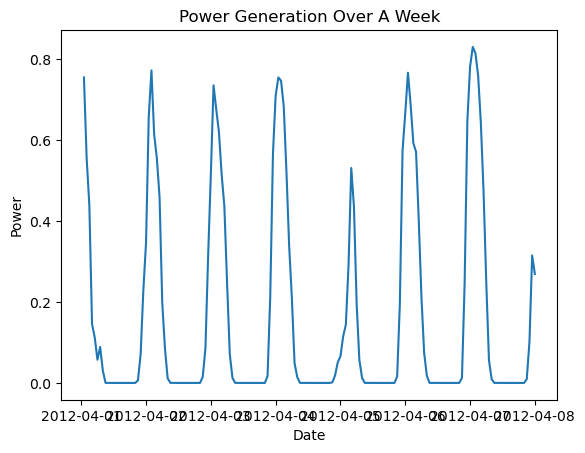

In [101]:
hours_in_week = 7 * 24
plt.title("Power Generation Over A Week")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(training_data[:hours_in_week]['DATETIME'], training_data[:hours_in_week]['POWER'])

The graph above highlights the cyclical nature of power generation over the course of a week.

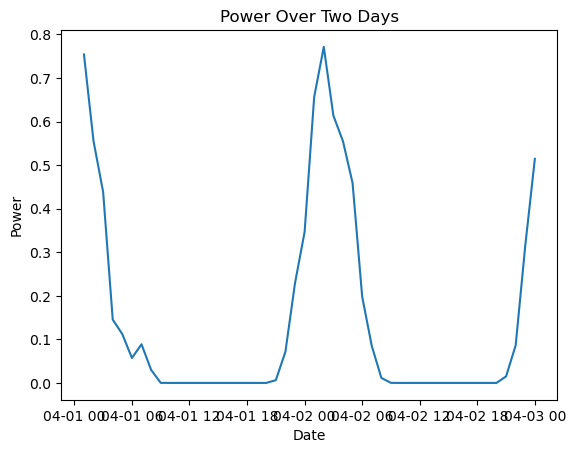

In [102]:
data_range = 2 * 24
plt.title("Power Over Two Days")
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(training_data[:data_range]['DATETIME'], training_data[:data_range]['POWER'])

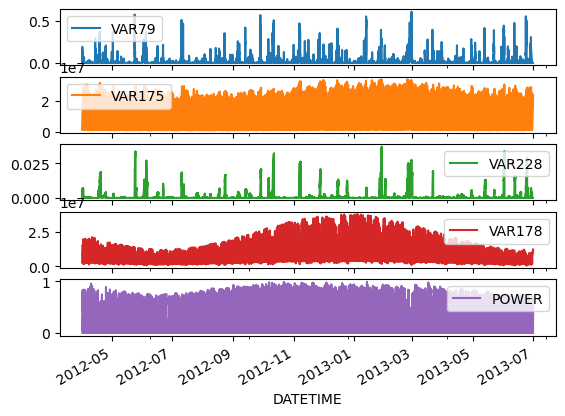

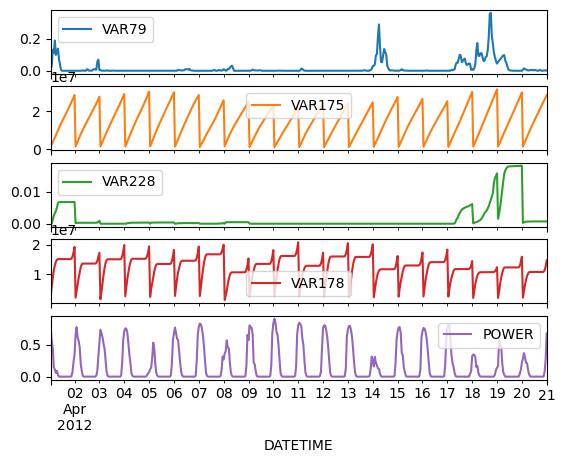

In [103]:
plot_cols = ['VAR79', 'VAR175', 'VAR228', 'VAR178', 'POWER']
plot_features = training_data[plot_cols]
plot_features.index = training_data['DATETIME']
_ = plot_features.plot(subplots=True)

plot_features = training_data[plot_cols][:480]
plot_features.index = training_data['DATETIME'][:480]
_ = plot_features.plot(subplots=True)

# Feature Engineering

In [113]:
# Split training data into training and validation sets

num_samples = len(training_data_1)
train_data = training_data_1[0:int(num_samples*.7)]
train_time = train_data.pop('DATETIME')
val_data = training_data_1[int(num_samples*.7):]
val_time = val_data.pop('DATETIME')

In [ ]:
# Normalize Data

training_mean = train_data.mean()
training_std = train_data.std()

training_data = (training_data - training_mean) / training_std

## Definition of Performance Metrics
This project uses Mean Absolute error and Root Mean Squared Error to assess model performance.

In [ ]:
# Definition of performance metrics
import numpy as np

def calc_performance_metrics(predictions, labels):
    return calc_mean_abs_err(predictions, labels), calc_rms_err(predictions, labels)
def calc_mean_abs_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    abs_diff = np.absolute(difference)
    return np.sum(abs_diff) / num_points

def calc_rms_err(predictions, labels):
    num_points = len(predictions)
    difference = labels - predictions
    abs_diff = np.absolute(difference)
    sqr_diff = np.square(abs_diff)
    return np.sqrt((1/num_points)*np.sum(sqr_diff))
    

# Challenges
- Data
    - Noise
    - Outliers
- Model Selection
    - DNN?
    - ensemble?
    - random forest?

# References
Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond
https://doi.org/10.1016/j.ijforecast.2016.02.001

TensorFlow Time Series Forecasting https://www.tensorflow.org/tutorials/structured_data/time_series